In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# from ipywidgets import interact, IntSlider, FloatSlider, fixed
from astropy.modeling.models import Gaussian1D

import lightkurve as lk

# import seaborn as sns

# import echelle
from astropy.timeseries import LombScargle
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel

/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/ccra8514/.lightkurve/cache. Please move all the files in the legacy directory /Users/ccra8514/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 17
plt.rcParams['axes.labelsize'] = 15
# plt.rcParams['savefig.transparent'] = False
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.edgecolor'] = 'white'

In [43]:
lc_echelle = lk.search_lightcurve('KIC 9655101',exptime=1800)#, author='Kepler',exptime=1800).download_all().stitch()
lc_echelle

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr009655101,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr009655101,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr009655101,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr009655101,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr009655101,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr009655101,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr009655101,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr009655101,0.0
8,Kepler Quarter 08,2011,Kepler,1800,kplr009655101,0.0


In [44]:
# lc_echelle = lk.search_lightcurve('KIC 2158410', author='Kepler', exptime=1800)[0].download()#.download_all().stitch(
lc_echelle = lk.search_lightcurve('KIC 9655101', author='Kepler', exptime=1800).download_all().stitch()
lc_echelle

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
120.53875532674283,9.9966449e-01,3.3416294e-05,0,6.029067e-04,860.24893,849.82859,568,5.6269594e+05,1.9164669e+01,3.0799424e+03,1.0085546e+00,5.7239294e+05,1.9133671e+01,0,———,———,———,———,860.24893,3.5233144e-05,849.82859,2.9897068e-05,2.2891224e-03,-1.3579648e-03
120.55918972820655,9.9980026e-01,3.3449873e-05,0,6.037082e-04,860.24940,849.82886,569,5.6280575e+05,1.9167124e+01,3.0792534e+03,1.0068386e+00,5.7247069e+05,1.9152897e+01,0,———,———,———,———,860.24940,3.5225145e-05,849.82886,2.9897206e-05,2.5436373e-03,-1.1277581e-03
120.57962402972771,9.9985123e-01,3.3576507e-05,10000000,6.045097e-04,860.24880,849.82888,570,5.6281131e+05,1.9167658e+01,3.0804048e+03,1.0077127e+00,5.7249988e+05,1.9225407e+01,10000000,———,———,———,———,860.24880,3.5225043e-05,849.82888,2.9898032e-05,2.2027716e-03,-8.1728771e-04
120.60005853118491,9.9982327e-01,3.3504231e-05,0,6.053112e-04,860.24919,849.82928,571,5.6278769e+05,1.9168041e+01,3.0780469e+03,1.0077817e+00,5.7248388e+05,1.9184023e+01,0,———,———,———,———,860.24919,3.5224573e-05,849.82928,2.9901801e-05,2.3369524e-03,-2.7321881e-04
120.62049293270684,9.9989915e-01,3.3583903e-05,0,6.061127e-04,860.24856,849.82953,572,5.6280900e+05,1.9167631e+01,3.0825688e+03,1.0075228e+00,5.7252731e+05,1.9229641e+01,0,———,———,———,———,860.24856,3.5227538e-05,849.82953,2.9902330e-05,2.0528715e-03,2.0942387e-04
120.64092723428621,9.9995309e-01,3.3539091e-05,0,6.069143e-04,860.24845,849.82941,573,5.6284388e+05,1.9167875e+01,3.0779087e+03,1.0082666e+00,5.7255819e+05,1.9203981e+01,0,———,———,———,———,860.24845,3.5216286e-05,849.82941,2.9897375e-05,1.8055668e-03,4.9545226e-04
120.66136163580086,1.0001465e+00,3.3537774e-05,0,6.077158e-04,860.24854,849.82973,574,5.6295944e+05,1.9170382e+01,3.0763743e+03,1.0081309e+00,5.7266894e+05,1.9203228e+01,0,———,———,———,———,860.24854,3.5216657e-05,849.82973,2.9900553e-05,1.9282543e-03,6.8407768e-04
120.68179613738175,1.0002906e+00,3.3562665e-05,0,6.085174e-04,860.24841,849.82964,575,5.6305856e+05,1.9171970e+01,3.0777222e+03,1.0091115e+00,5.7275150e+05,1.9217480e+01,0,———,———,———,———,860.24841,3.5213092e-05,849.82964,2.9897976e-05,1.8762911e-03,6.7954074e-04


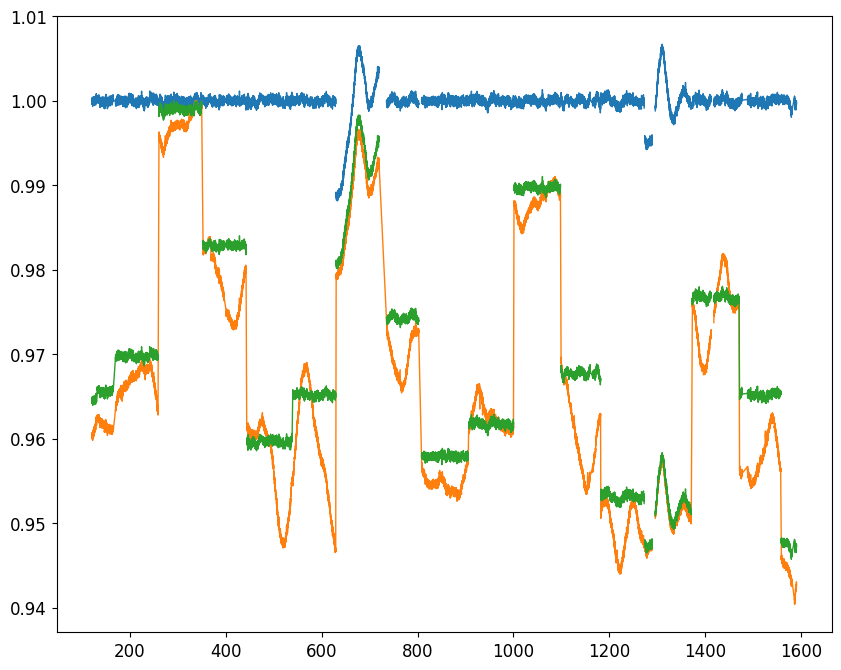

In [45]:
plt.plot(lc_echelle.time.value,lc_echelle.flux.value)
plt.plot(lc_echelle.time.value,lc_echelle.sap_flux/np.max(lc_echelle.sap_flux))
plt.plot(lc_echelle.time.value,lc_echelle.pdcsap_flux/np.max(lc_echelle.pdcsap_flux))
# plt.savefig('/Users/ccra8514/Desktop/pdc_sap_comparison')
plt.show()

# Creating your own PDCSAP

In [4]:
from lightkurve import search_lightcurve
from lightkurve.correctors import load_kepler_cbvs
# import numpy as np

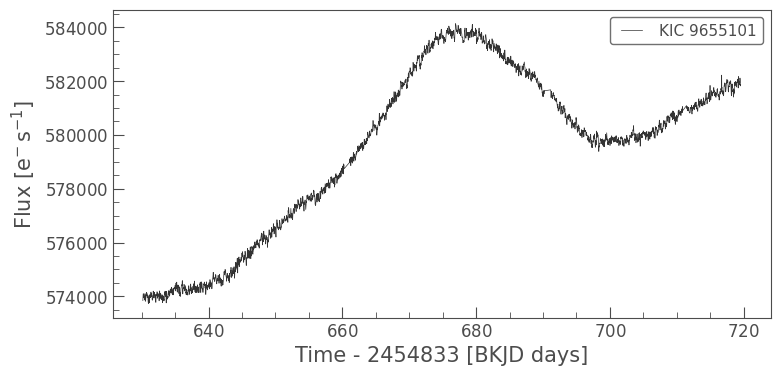

In [113]:
lc = search_lightcurve('KIC 9655101', quarter=7).download(flux_column='sap_flux') #quarter=14
lc.plot();

In [114]:
cbvs = load_kepler_cbvs(quarter=lc.quarter, channel=lc.channel, 
                        mission='Kepler')

In [115]:
cbvs[0:4]

time,CADENCENO,VECTOR_1,VECTOR_2,VECTOR_3,VECTOR_4,VECTOR_5,VECTOR_6,VECTOR_7,VECTOR_8,VECTOR_9,VECTOR_10,VECTOR_11,VECTOR_12,VECTOR_13,VECTOR_14,VECTOR_15,VECTOR_16,GAP
,,,,,,,,,,,,,,,,,,
Time,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32
55462.67250542,25509,0.02542,-0.04335,-0.04712,0.09932,-0.10323,0.08156,0.00641,-0.00284,-0.01891,-0.02796,-0.00843,-0.03485,0.06911,-0.02898,-0.02128,-0.05777,1
55462.69293912,25510,0.02542,-0.04335,-0.04712,0.09932,-0.10323,0.08156,0.00641,-0.00284,-0.01891,-0.02796,-0.00843,-0.03485,0.06911,-0.02898,-0.02128,-0.05777,0
55462.71337272,25511,0.02522,-0.04252,-0.04226,0.09167,-0.09996,0.07334,0.00921,-0.00436,-0.01785,-0.03097,0.00495,-0.02789,0.06016,-0.02408,-0.01837,-0.05757,0
55462.73380642,25512,0.02497,-0.04137,-0.03709,0.08233,-0.09064,0.07000,0.00682,-0.00756,-0.02421,-0.02953,0.00422,-0.02609,0.06169,-0.02128,-0.01430,-0.04515,0


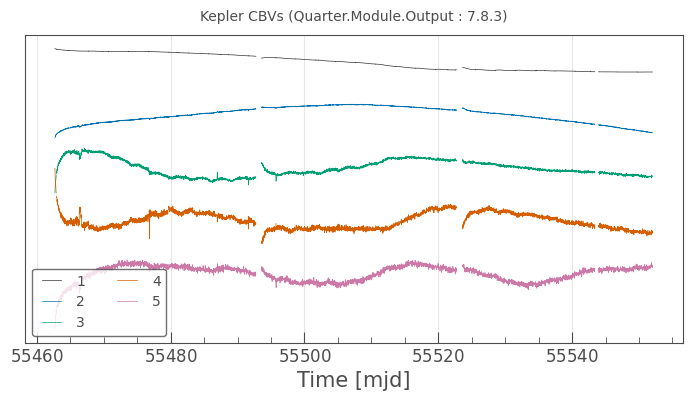

In [116]:
cbvs.plot(cbv_indices=np.arange(1,6));

In [117]:
# cbv_designmatrix = cbvs.to_designmatrix(cbv_indices=np.arange(1,6), name='10.1.1.SingleScale')
# cbv_designmatrix

In [118]:
# cbv_designmatrix.plot();

In [119]:
# # Take a cut of the LC loaded above
# lc_short = lc[501:1501]
# # Take a different cut of the CBVs
# cbvs_short = cbvs[0:1000]
# These cuts do not overlap
np.all(lc.cadenceno == cbvs.cadenceno)

False

In [120]:
# Align the cuts
cbvs_aligned = cbvs.align(lc)
# They now fully overlap
np.all(lc.cadenceno == cbvs_aligned.cadenceno)

True

In [121]:
# # Interpolate the CBVs to the FFI cadence times
# cbvs_interpolated = cbvs.interpolate(lc_short, extrapolate=False)
# # All cadence times agree
# np.all(lc_short.time.value == cbvs_interpolated.time.value)

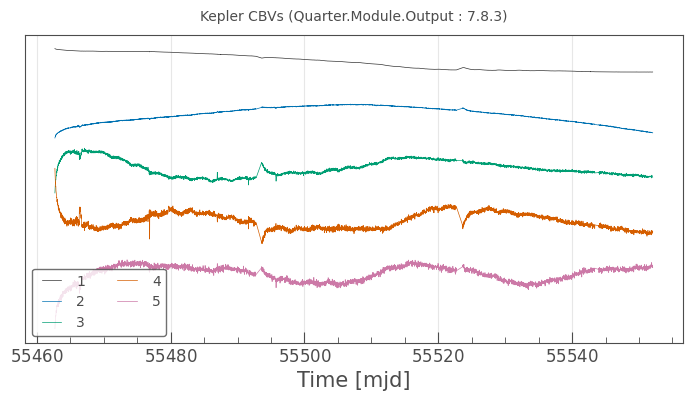

In [122]:
cbvs_aligned.plot(cbv_indices=np.arange(1,6));

In [123]:
from lightkurve.correctors import CBVCorrector

In [124]:
cbvCorrector = CBVCorrector(lc)

In [125]:
cbvCorrector.cbvs

[Kepler CBVs, Quarter.Module.Output : 7.8.3, nCBVs : 16]

In [126]:
cbvCorrector.cbvs[0].cbv_type

'SingleScale'

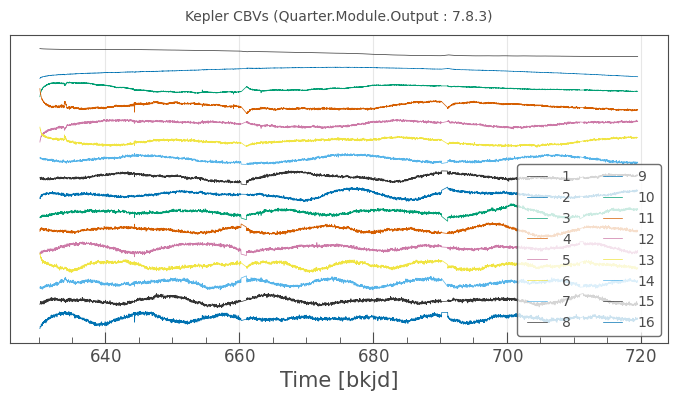

In [127]:
cbvCorrector.cbvs[0].plot();

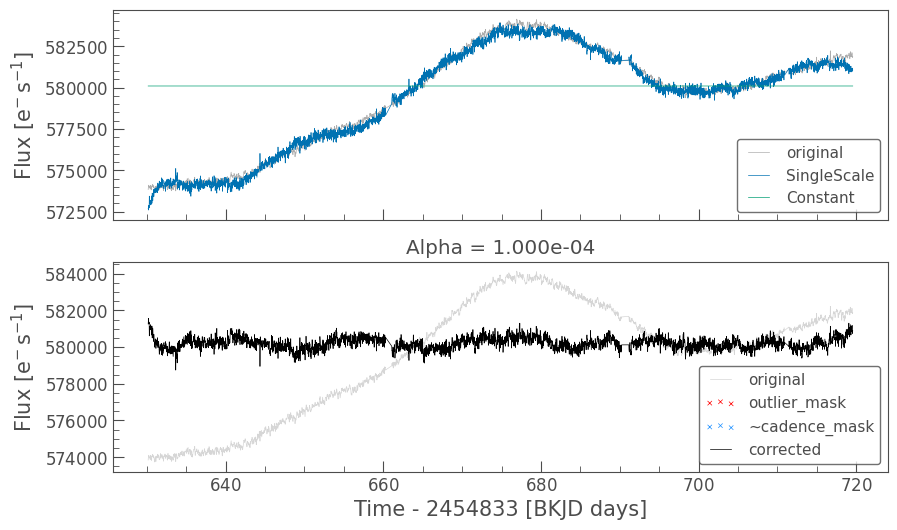

In [288]:
# Select which CBVs to use in the correction
cbv_type = ['SingleScale']#, 'Spike']
# Select which CBV indices to use
# Use the first 8 SingleScale and all Spike CBVS
cbv_indices = [np.arange(1,4)]#, 'ALL']
# Perform the correction

cbvCorrector.correct_gaussian_prior(cbv_type=['SingleScale'], cbv_indices=[np.arange(1,9)], alpha=1e-4)
cbvCorrector.diagnose();

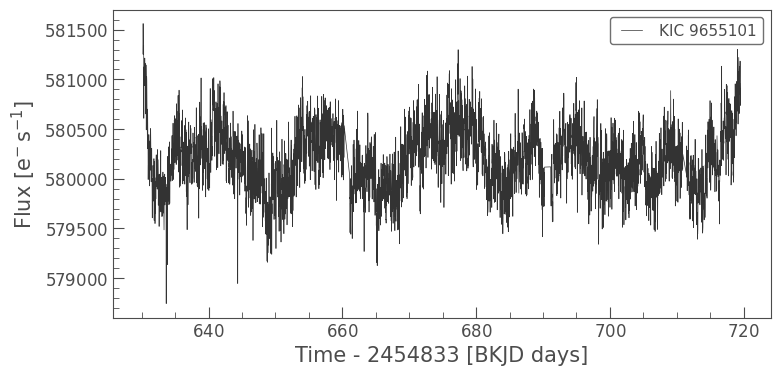

In [289]:
new_lc = cbvCorrector.corrected_lc
new_lc.plot();

In [285]:
# Note: this cell will be slow to run
print('Over fitting Metric: {}'.format(cbvCorrector.over_fitting_metric()))
print('Under fitting Metric: {}'.format(cbvCorrector.under_fitting_metric()))

Over fitting Metric: 0.00312335202215205
Under fitting Metric: 0.9992679925881398


/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [286]:
# cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);

/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Optimized Over-fitting metric: 0.4949895354611872
Optimized Under-fitting metric: 0.3210511946099083
Optimized Alpha: 4.557e+00


/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: Ru

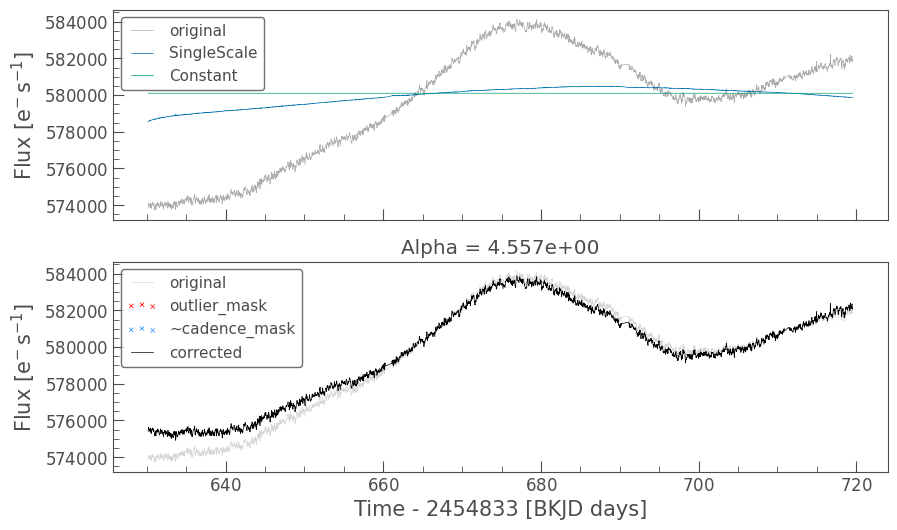

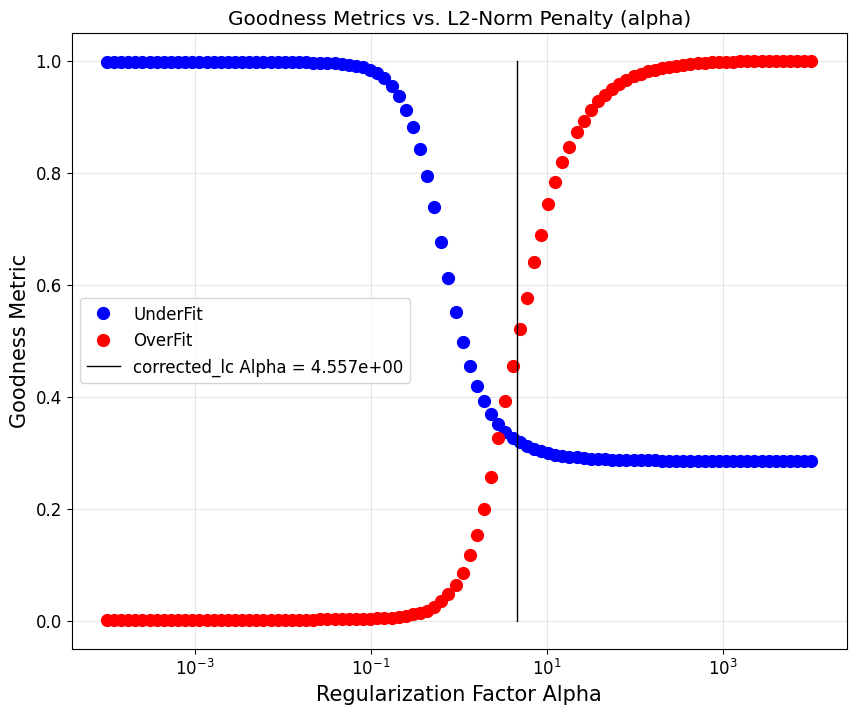

In [287]:
cbvCorrector.correct(cbv_type=cbv_type, cbv_indices=cbv_indices);
cbvCorrector.diagnose();
cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);

# Using the CBVs with other things

In [132]:
from lightkurve.correctors import DesignMatrix

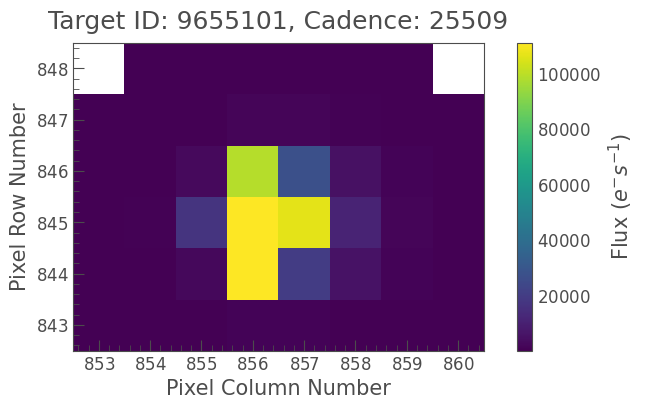

In [149]:
tpf = lk.search_targetpixelfile('KIC 9655101', exptime=1800, mission='Kepler', quarter=7).download()
tpf.plot();

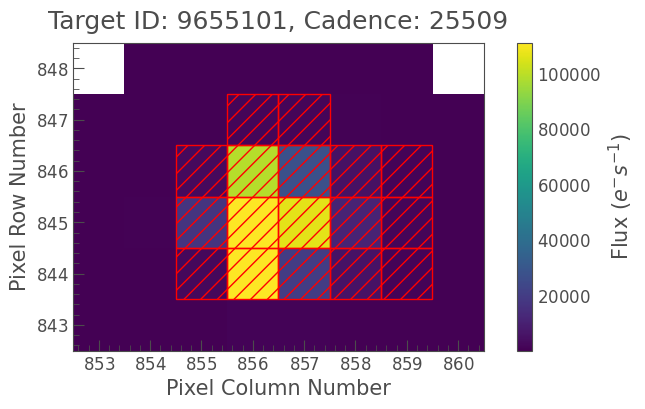

In [171]:
# Lets check what Kepler is using as the aperture
tpf.plot(aperture_mask=tpf.pipeline_mask);

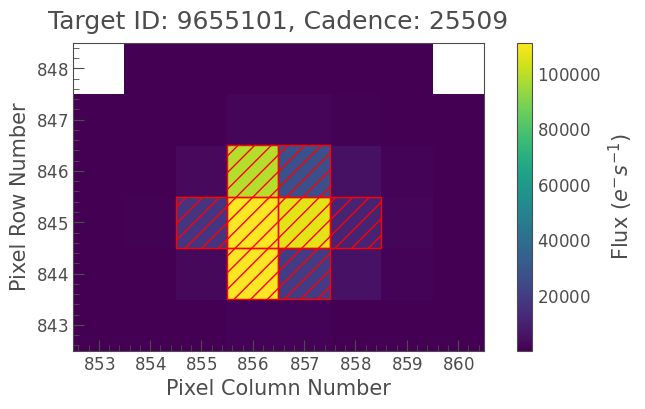

In [175]:
# Create a simple thresholded aperture mask
aper = tpf.create_threshold_mask(threshold=15, reference_pixel='center')
tpf.plot(aperture_mask=aper);

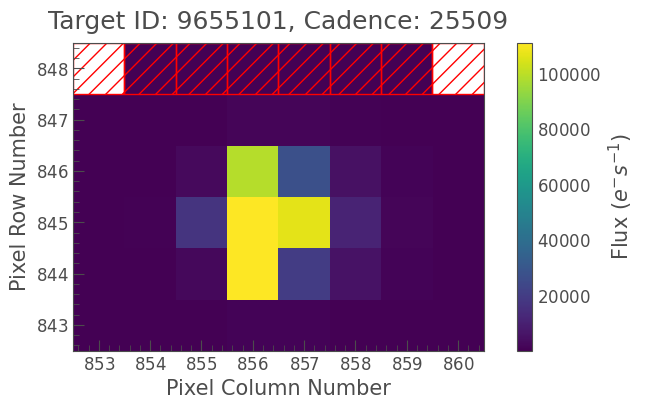

In [180]:
no_first_row_mask = np.asarray([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [True, True, True, True, True, True, True, True]])
tpf.plot(aperture_mask=no_first_row_mask);

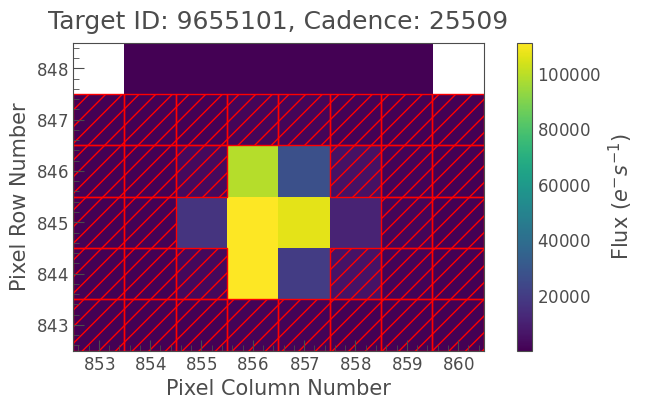

In [181]:
tpf.plot(aperture_mask=~aper&~no_first_row_mask);

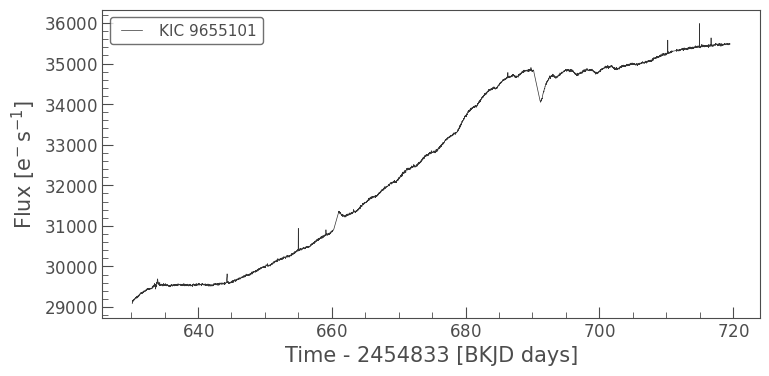

In [204]:
# Generate a simple aperture photometry light curve of the background
raw_bg = tpf.to_lightcurve(aperture_mask=~aper&~no_first_row_mask)
raw_bg.plot();

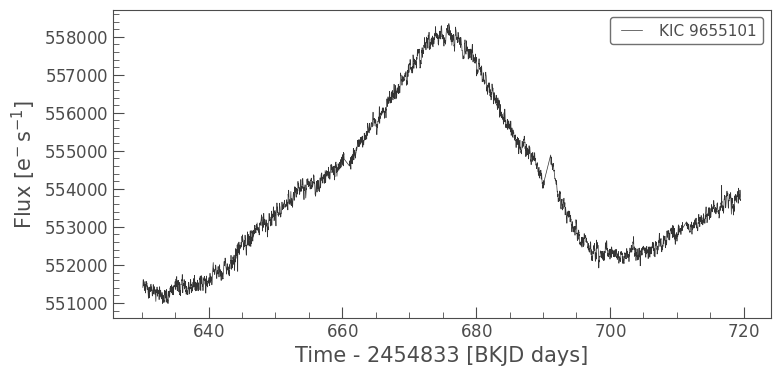

In [174]:
# Generate a simple aperture photometry light curve
raw_lc = tpf.to_lightcurve(aperture_mask=aper)
raw_lc.plot();

In [182]:
# Create a design matrix using PCA components from the cutout background
dm = DesignMatrix(tpf.flux[:, ~aper&~no_first_row_mask], name='pixel regressors').pca(5).append_constant()

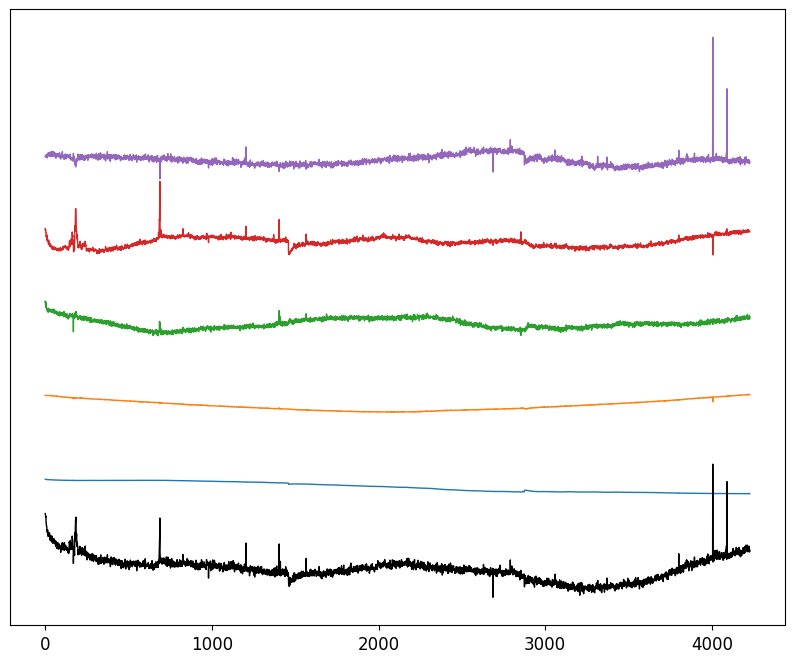

In [226]:
plt.plot(dm[0])
plt.plot(dm[1]+1/4)
plt.plot(dm[2]+2/4)
plt.plot(dm[3]+3/4)
plt.plot(dm[4]+4/4)
plt.plot(dm[0]+dm[1]+dm[2]+dm[3]+dm[4]-1/4,color='k')
# plt.plot(np.sum(dm[0:5]))
plt.yticks([])
plt.show()

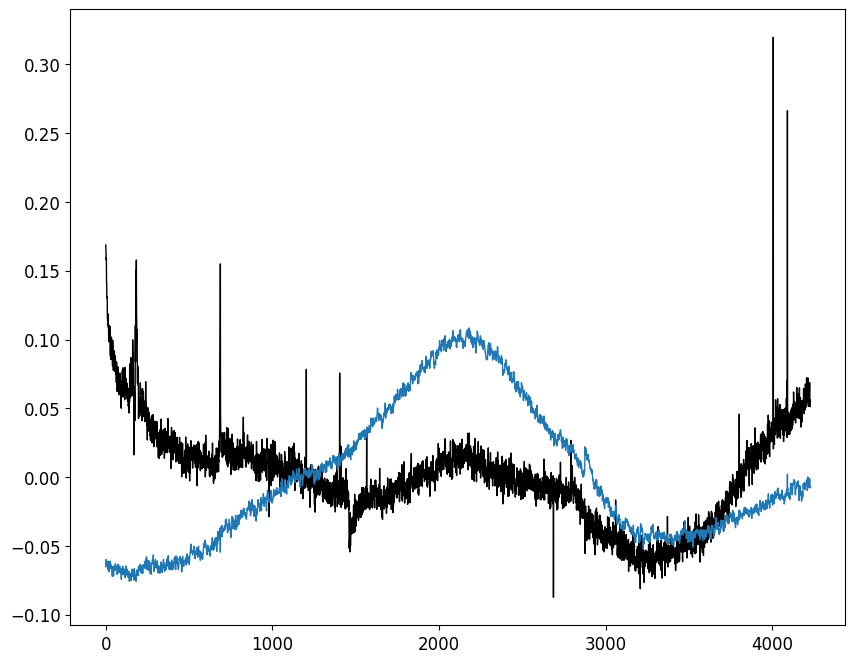

In [239]:
plt.plot(dm[0]+dm[1]+dm[2]+dm[3]+dm[4],color='k')
plt.plot((raw_lc.flux-np.mean(raw_lc.flux))/40000)
plt.show()

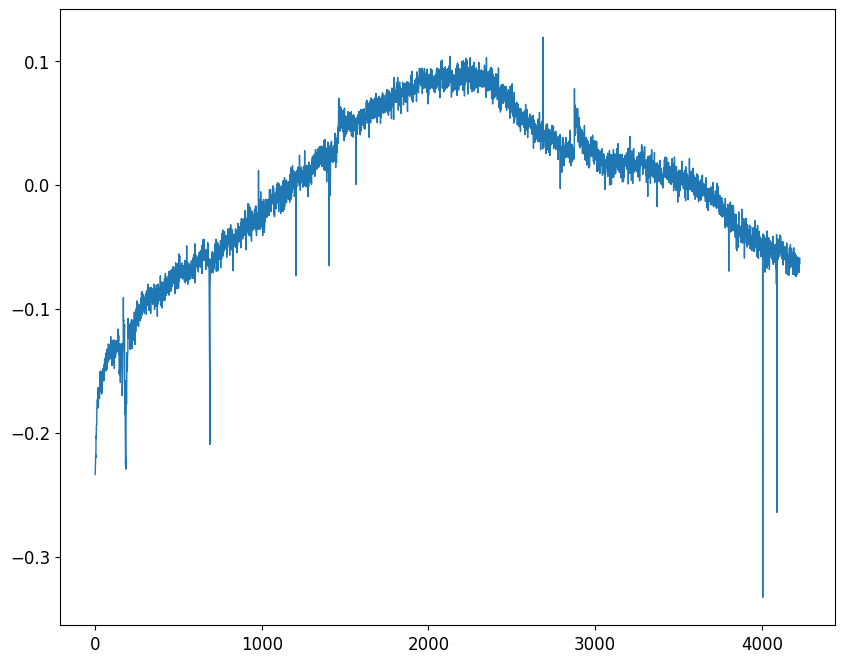

In [243]:
plt.plot(((raw_lc.flux.value-np.mean(raw_lc.flux.value))/40000)-(dm[0]+dm[1]+dm[2]+dm[3]+dm[4]))

Extrapolation of CBVs appears to be necessary. Extrapolated values will be filled with zeros. Recommend setting extrapolate=True
Some interpolated (or extrapolated) CBV values have been set to zero
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Over-fitting metric: 9.461789488461356e-07
CDPP: 123.95222520361756 ppm


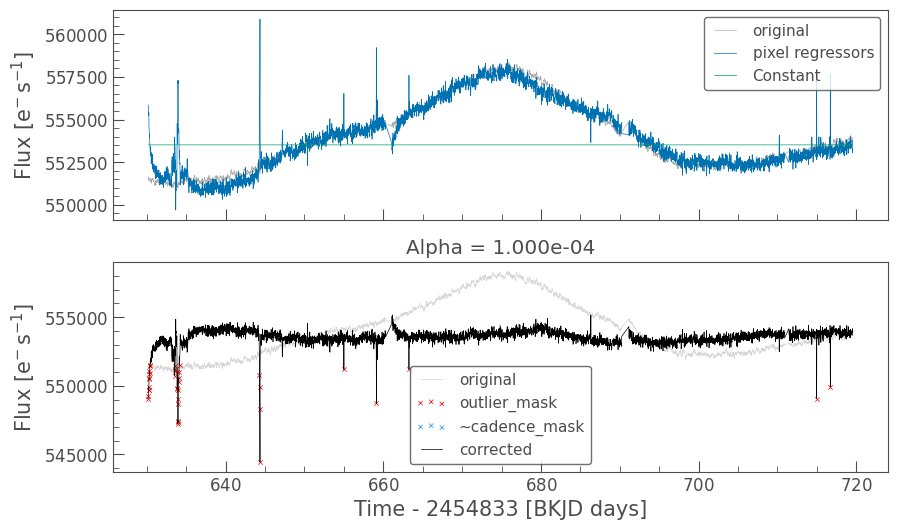

In [185]:
# Generate the CBVCorrector object and interpolate the downloaded CBVs to the light curve cadence
cbvcorrector = CBVCorrector(raw_lc)#, interpolate_cbvs=True)
# Perform an unrestricted least-squares fit using only the pixel-derived design matrix.
cbvcorrector.correct_gaussian_prior(cbv_type=None, cbv_indices=None, ext_dm=dm, alpha=1e-4)
cbvcorrector.diagnose()
print('Over-fitting metric: {}'.format(cbvcorrector.over_fitting_metric()))
print('CDPP: {}'.format(cbvcorrector.corrected_lc.estimate_cdpp()))
corrected_lc_just_pixel_dm = cbvcorrector.corrected_lc

/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Over-fitting metric: 9.46353190276411e-06
CDPP: 125.21899108301807 ppm


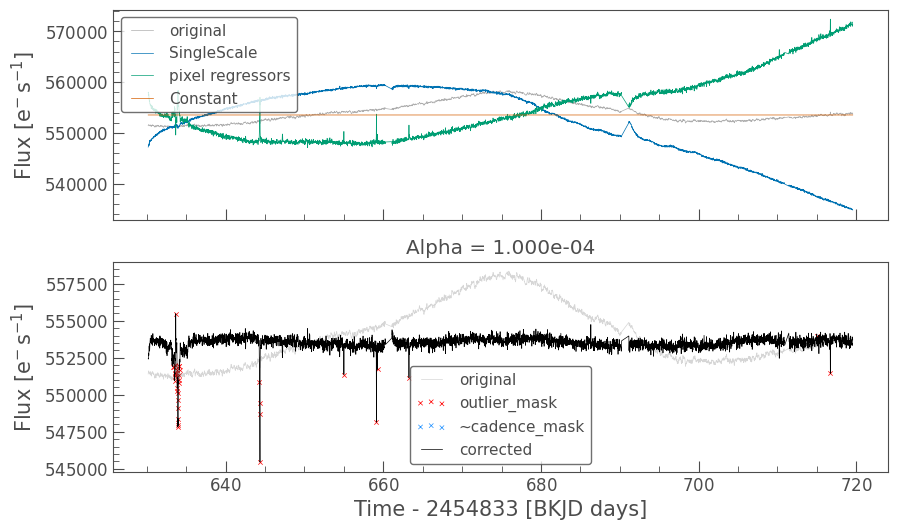

In [201]:
# Select which CBVs to use in the correction
cbv_type = ['SingleScale']#, 'Spike']
# Select which CBV indices to use
cbv_indices = [np.arange(1,4)]#, 'ALL']
# Generate the CBVCorrector object and interpolate the downloaded CBVs to the light curve cadence
cbvcorrector = CBVCorrector(raw_lc)#, interpolate_cbvs=True)
# Perform an unrestricted least-squares fit using only the pixel-derived design matrix.
cbvcorrector.correct_gaussian_prior(cbv_type=cbv_type, cbv_indices=cbv_indices, ext_dm=dm, alpha=1e-4)
cbvcorrector.diagnose()
print('Over-fitting metric: {}'.format(cbvcorrector.over_fitting_metric()))
print('CDPP: {}'.format(cbvcorrector.corrected_lc.estimate_cdpp()))
corrected_lc_just_pixel_dm = cbvcorrector.corrected_lc

/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: Ru

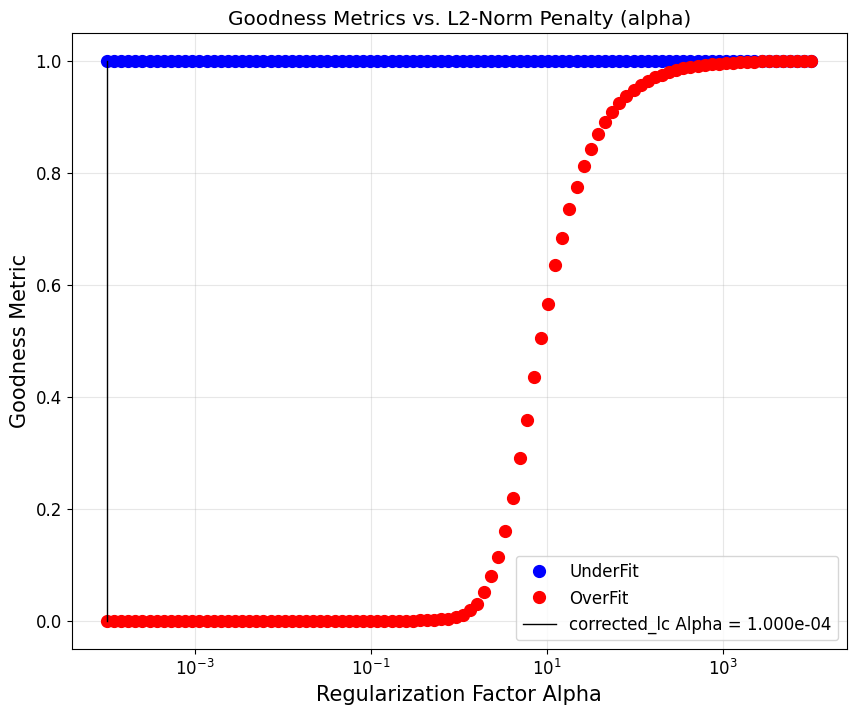

In [202]:
cbvcorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices, ext_dm=dm);

/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Optimized Over-fitting metric: 0.9996488557442157
Optimized Under-fitting metric: 1.0
Optimized Alpha: 9.877e+03
CDPP: 107.30059867654388 ppm


/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: Ru

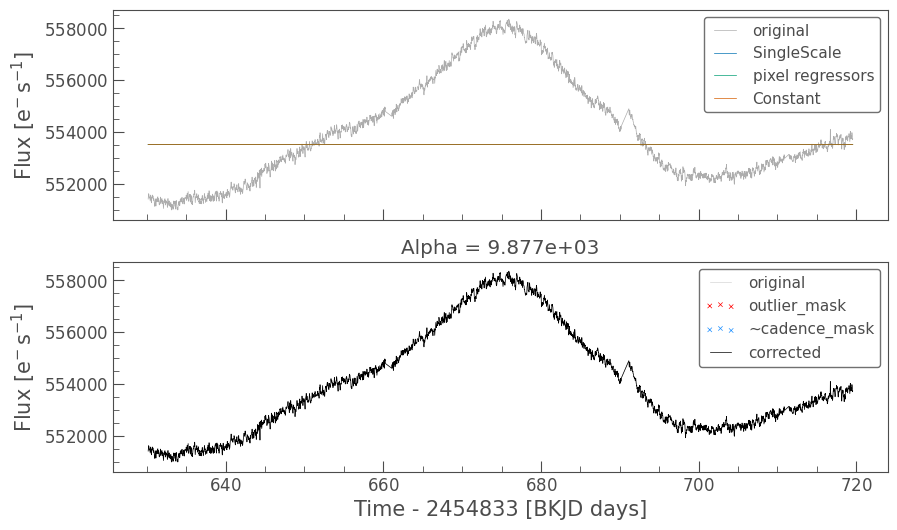

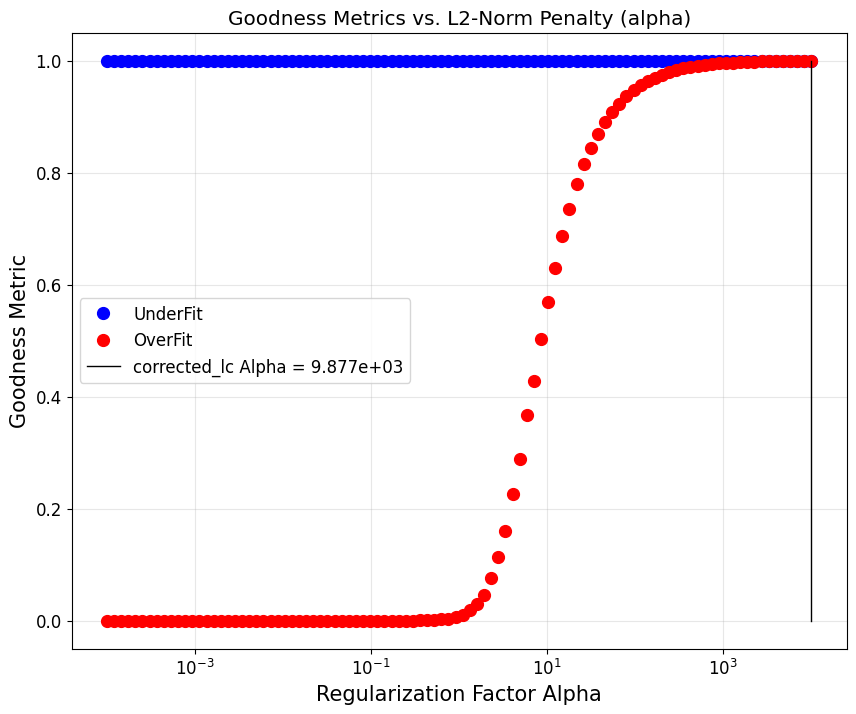

In [203]:
# Optimize the fit but ignore the under-fitting metric and set bounds on the alpha parameter.
cbvcorrector.correct(cbv_type=cbv_type, cbv_indices=cbv_indices, ext_dm=dm)#, 
#                      alpha_bounds=[1e-4, 10**(-0.5)], target_over_score=0.2, target_under_score=-1)
cbvcorrector.diagnose();
print('CDPP: {}'.format(cbvcorrector.corrected_lc.estimate_cdpp()))
cbvcorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices, ext_dm=dm);

# How does this fit in with the original lightcurve

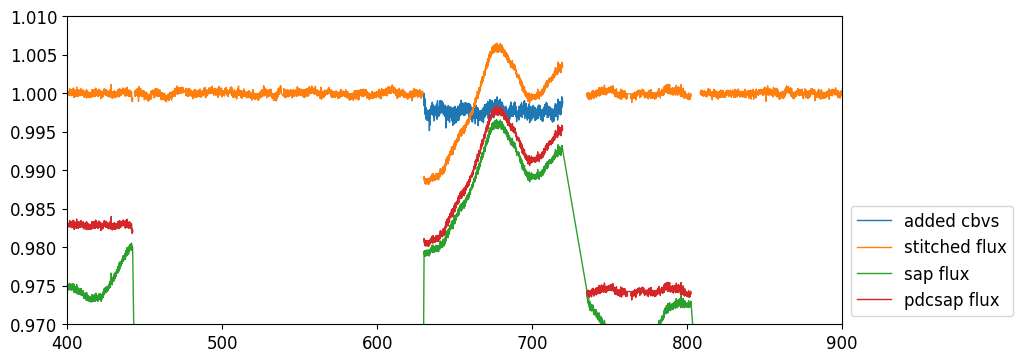

In [293]:
plt.figure(figsize=(10,4))
plt.plot(new_lc.time.value,new_lc.flux.value/np.max(new_lc.flux.value),label='added cbvs')

plt.plot(lc_echelle.time.value,lc_echelle.flux.value,label='stitched flux')
plt.plot(lc_echelle.time.value,lc_echelle.sap_flux/np.max(lc_echelle.sap_flux),label='sap flux')
plt.plot(lc_echelle.time.value,lc_echelle.pdcsap_flux/np.max(lc_echelle.pdcsap_flux),label='pdcsap flux')
# plt.savefig('/Users/ccra8514/Desktop/pdc_sap_comparison')
# plt.xlim(600,750)
plt.xlim(400,900)
plt.ylim(bottom=0.97)
# plt.ylim(bottom=0.99)
plt.legend(loc='lower left',bbox_to_anchor=(1,0))
# plt.savefig('/Users/ccra8514/Desktop/CBVcorrection',bbox_inches='tight')
plt.show()